In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
#Import requests library
import requests
#Import the API key
from config import weather_api_key

In [7]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
#Import the datetime module from the datetime library
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count=1
set_count=1

#Loop through all the cities in our list
#for i in range(len(cities)):
    #Group cities in sets of 50 for logging purposes
 #   if (i % 50==0 and i>=50):
  #      set_count+=1
   #     record_count=1
    #Create endpoint URL with each city
    #city_url=url+"&q="+cities[i]

#Instead of two for loops use the enumerate function
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | burica
City not found. Skipping...
Processing Record 7 of Set 1 | puerto escondido
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | marsabit
Processing Record 11 of Set 1 | lumeje
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | nicoya
Processing Record 14 of Set 1 | waingapu
Processing Record 15 of Set 1 | cap-aux-meules
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | ketchikan
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | oranj

Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | qasigiannguit
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | kudahuvadhoo
Processing Record 47 of Set 4 | vysokogornyy
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | paamiut
Processing Record 50 of Set 4 | ahipara
Processing Record 1 of Set 5 | mayumba
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 5 | meadow lake
Processing Record 5 of Set 5 | itoman
Processing Record 6 of Set 5 | san pedro
Processing Record 7 of Set 5 | simao
Processing Record 8 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 5 | tambun
Processing Record 10 of Set 5 | visnes
Processing Record 11 of Set 5 | iqaluit
Processing Record 12 of Set 5 | valle del guamuez
Processing Record 13 of Set 5 | salinopolis
Processing Record

Processing Record 31 of Set 8 | anjangaon
Processing Record 32 of Set 8 | honiara
Processing Record 33 of Set 8 | faya
Processing Record 34 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 35 of Set 8 | asfi
Processing Record 36 of Set 8 | ibra
Processing Record 37 of Set 8 | broken hill
Processing Record 38 of Set 8 | sao joao del rei
Processing Record 39 of Set 8 | kendari
Processing Record 40 of Set 8 | baruun-urt
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | srednekolymsk
Processing Record 43 of Set 8 | plouzane
Processing Record 44 of Set 8 | kodinsk
Processing Record 45 of Set 8 | chipinge
Processing Record 46 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 47 of Set 8 | hauge
Processing Record 48 of Set 8 | reconquista
Processing Record 49 of Set 8 | lorengau
Processing Record 50 of Set 8 | lima
Processing Record 1 of Set 9 | amderma
City not found. Skipping...
Processing Record 2 of Set 9 | pombia
Processing 

Processing Record 18 of Set 12 | la ronge
Processing Record 19 of Set 12 | coahuayana
Processing Record 20 of Set 12 | saint-augustin
Processing Record 21 of Set 12 | kangalassy
Processing Record 22 of Set 12 | yashkul
Processing Record 23 of Set 12 | lata
Processing Record 24 of Set 12 | deputatskiy
Processing Record 25 of Set 12 | oussouye
Processing Record 26 of Set 12 | caluquembe
Processing Record 27 of Set 12 | marcona
City not found. Skipping...
Processing Record 28 of Set 12 | tachi
City not found. Skipping...
Processing Record 29 of Set 12 | naryan-mar
Processing Record 30 of Set 12 | culpeper
Processing Record 31 of Set 12 | boende
Processing Record 32 of Set 12 | cabedelo
Processing Record 33 of Set 12 | yerofey pavlovich
Processing Record 34 of Set 12 | ndele
Processing Record 35 of Set 12 | chupa
Processing Record 36 of Set 12 | gushikawa
Processing Record 37 of Set 12 | kuito
Processing Record 38 of Set 12 | grand gaube
Processing Record 39 of Set 12 | batagay-alyta
Proce

In [11]:
#Convert the array of dictionaries to a pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.94,76,100,18.68,PF,2021-10-21 13:43:40
1,Esperance,-33.8667,121.9000,58.84,73,98,15.19,AU,2021-10-21 13:43:40
2,Upernavik,72.7868,-56.1549,22.42,88,42,16.20,GL,2021-10-21 13:43:40
3,Jamestown,42.0970,-79.2353,58.71,88,20,1.99,US,2021-10-21 13:43:41
4,Severo-Kurilsk,50.6789,156.1250,36.32,65,86,8.39,RU,2021-10-21 13:43:41
5,Puerto Escondido,15.8500,-97.0667,74.23,78,75,8.05,MX,2021-10-21 13:43:42
6,Punta Arenas,-53.1500,-70.9167,46.51,66,75,21.85,CL,2021-10-21 13:42:56
7,Marsabit,2.3284,37.9899,78.76,38,95,15.26,KE,2021-10-21 13:43:42
8,Lumeje,-11.5500,20.7833,84.96,42,83,4.18,AO,2021-10-21 13:43:42
9,Cabo San Lucas,22.8909,-109.9124,78.51,83,0,3.85,MX,2021-10-21 13:43:43


In [12]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-10-21 13:43:40,-23.1203,-134.9692,73.94,76,100,18.68
1,Esperance,AU,2021-10-21 13:43:40,-33.8667,121.9000,58.84,73,98,15.19
2,Upernavik,GL,2021-10-21 13:43:40,72.7868,-56.1549,22.42,88,42,16.20
3,Jamestown,US,2021-10-21 13:43:41,42.0970,-79.2353,58.71,88,20,1.99
4,Severo-Kurilsk,RU,2021-10-21 13:43:41,50.6789,156.1250,36.32,65,86,8.39


In [13]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#Extract relevant fields from the dataframe for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

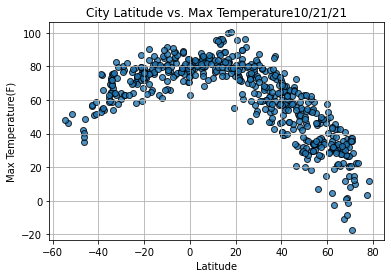

In [15]:
#Import time module
import time

#Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

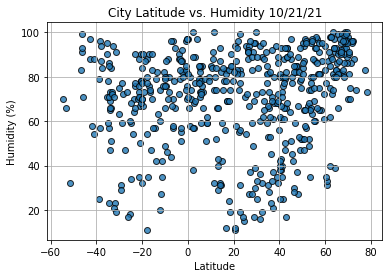

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

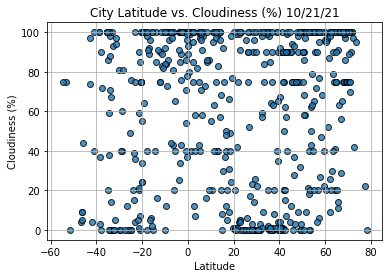

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

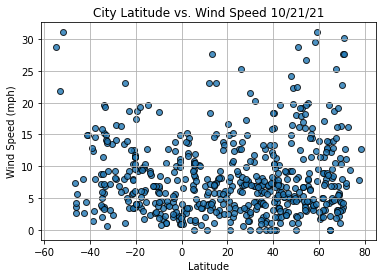

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
#Create a function to perform linear regression on the weater data and plot a regression line and the equation with the data
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City             Praia Da Vitoria
Country                        PT
Date          2021-10-21 13:43:44
Lat                       38.7333
Lng                      -27.0667
Max Temp                    73.76
Humidity                       68
Cloudiness                     40
Wind Speed                   6.04
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
549     True
550    False
551    False
552    False
553     True
Name: Lat, Length: 554, dtype: bool

In [23]:
#Using loc to get a data frame with just the northern hemisphere
city_data_df.loc[(city_data_df["Lat"]>=0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Upernavik,GL,2021-10-21 13:43:40,72.7868,-56.1549,22.42,88,42,16.20
3,Jamestown,US,2021-10-21 13:43:41,42.0970,-79.2353,58.71,88,20,1.99
4,Severo-Kurilsk,RU,2021-10-21 13:43:41,50.6789,156.1250,36.32,65,86,8.39
5,Puerto Escondido,MX,2021-10-21 13:43:42,15.8500,-97.0667,74.23,78,75,8.05
7,Marsabit,KE,2021-10-21 13:43:42,2.3284,37.9899,78.76,38,95,15.26


In [24]:
#Create nothern and southern hemisphere dataframes
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<=0)]

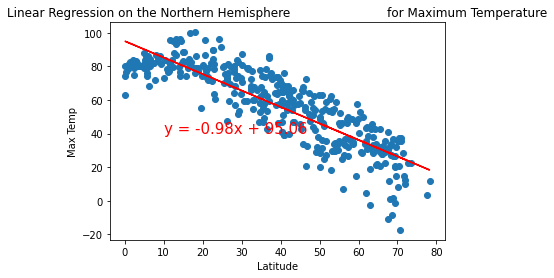

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

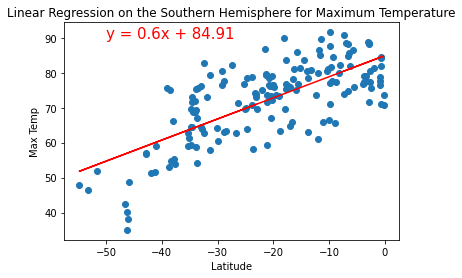

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

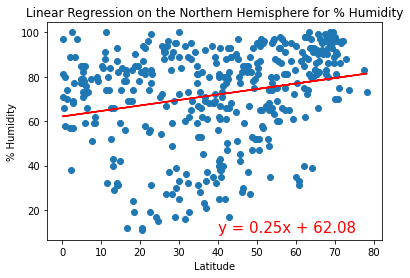

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

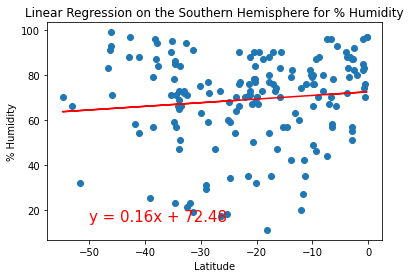

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

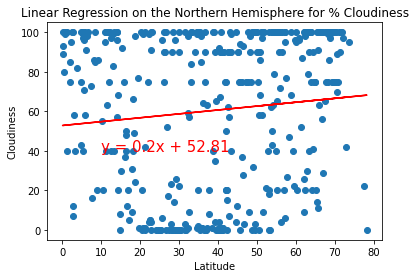

In [37]:
#SKILL DRILL Cloudiness
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(10,40))

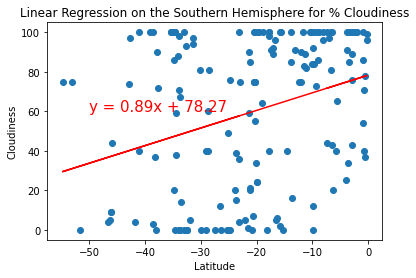

In [39]:
#SKILL DRILL Cloudiness
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 'Cloudiness',(-50,60))

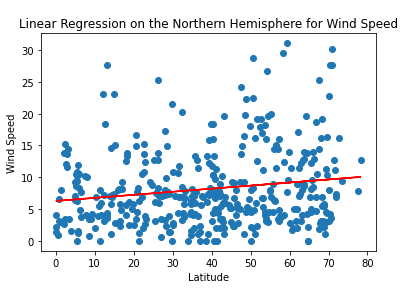

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

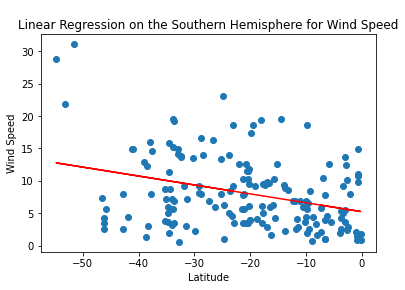

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))